# Project: Unsupervised Learning with KMeans Clustering
## Introduction :
This project focuses on applying Unsupervised Machine Learning techniques to discover patterns or groupings within a dataset without using any labeled output. Specifically, we use the KMeans Clustering algorithm to segment the data into distinct clusters based on similarity in feature space.

Unsupervised learning is valuable when we don't have predefined classes or labels but still want to extract meaningful structure from the data. Clustering helps in understanding underlying data patterns, customer segmentation, anomaly detection, market research, and more.

### Unsupervised Machine Learning 
Unsupervised learning is a type of machine learning where the algorithm learns from unlabeled data, without explicit guidance or labeled outputs. It focuses on discovering hidden patterns, structures, and relationships within the data. Unlike supervised learning, it doesn't rely on predefined categories or correct answers. Instead, it explores the data to identify inherent groupings, anomalies, or other meaningful insights. 


## Dataset Overview
The dataset used in this project contains multiple features describing different samples. Since the dataset name wasn't explicitly mentioned, it seems to be a synthetic or preprocessed dataset used for educational purposes on clustering. It contains a mix of numerical and possibly categorical variables.

We perform the following key steps on this dataset:

1. Data cleaning (handling missing values)
2. Exploratory Data Analysis (EDA)
3. Label Encoding (if required for categorical variables)
4. Feature Scaling (standardization)
5. Applying KMeans Clustering
6. Visualizing clusters
7. Evaluating optimal number of clusters using the Elbow method and Silhouette Score

The overall goal is to divide the dataset into distinct groups (clusters) that share similar characteristics based on the input features.

### Import all modules

In [36]:
import pandas as pd
import numpy as np
import dtale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### Load Dataset 

In [37]:
df=pd.read_csv("Mall_Customers (1).csv")

In [38]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data cleaning :

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There is no null values in the Dataset.

### dtale Library Overview:
dtale is a Python library that provides an interactive web-based GUI (like Excel or Power BI-style interface) for exploring pandas DataFrames. It helps you quickly understand and manipulate your dataset visually without writing code for every step.

* dtale.show(df) launches an interactive data viewer in your browser.
* You can sort, filter, group, rename columns, visualize data, and even edit DataFrame values.
* It’s extremely useful for EDA (Exploratory Data Analysis) and debugging datasets.

In [42]:
d= dtale.show(df)

In [9]:
d

### Exploratory Data Analysis (EDA)

#### 1. Descirbe Statistics

In [43]:
df.shape

(200, 5)

In [46]:
# Summary statistics for numerical columns
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### 2. Check for Missing Values Again

In [47]:
# Check for any remaining missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### 3. Data Types and Unique Values

In [49]:
# Data types and number of unique values
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [50]:
# Count of unique values in each column (helpful for categorical data)
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

#### 4. Barplots / Countplots for Categorical Columns

C:\Users\lokes\AppData\Local\Temp\ipykernel_1544\3401250898.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




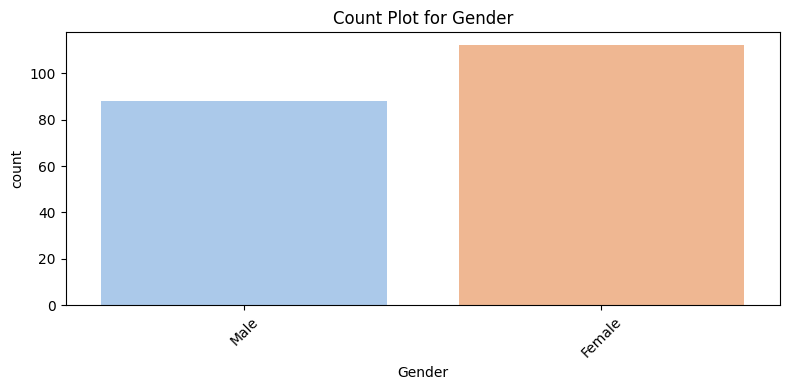

In [55]:
# Plot countplots for all categorical columns (object or category type)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### 5. Histograms for Numerical Columns

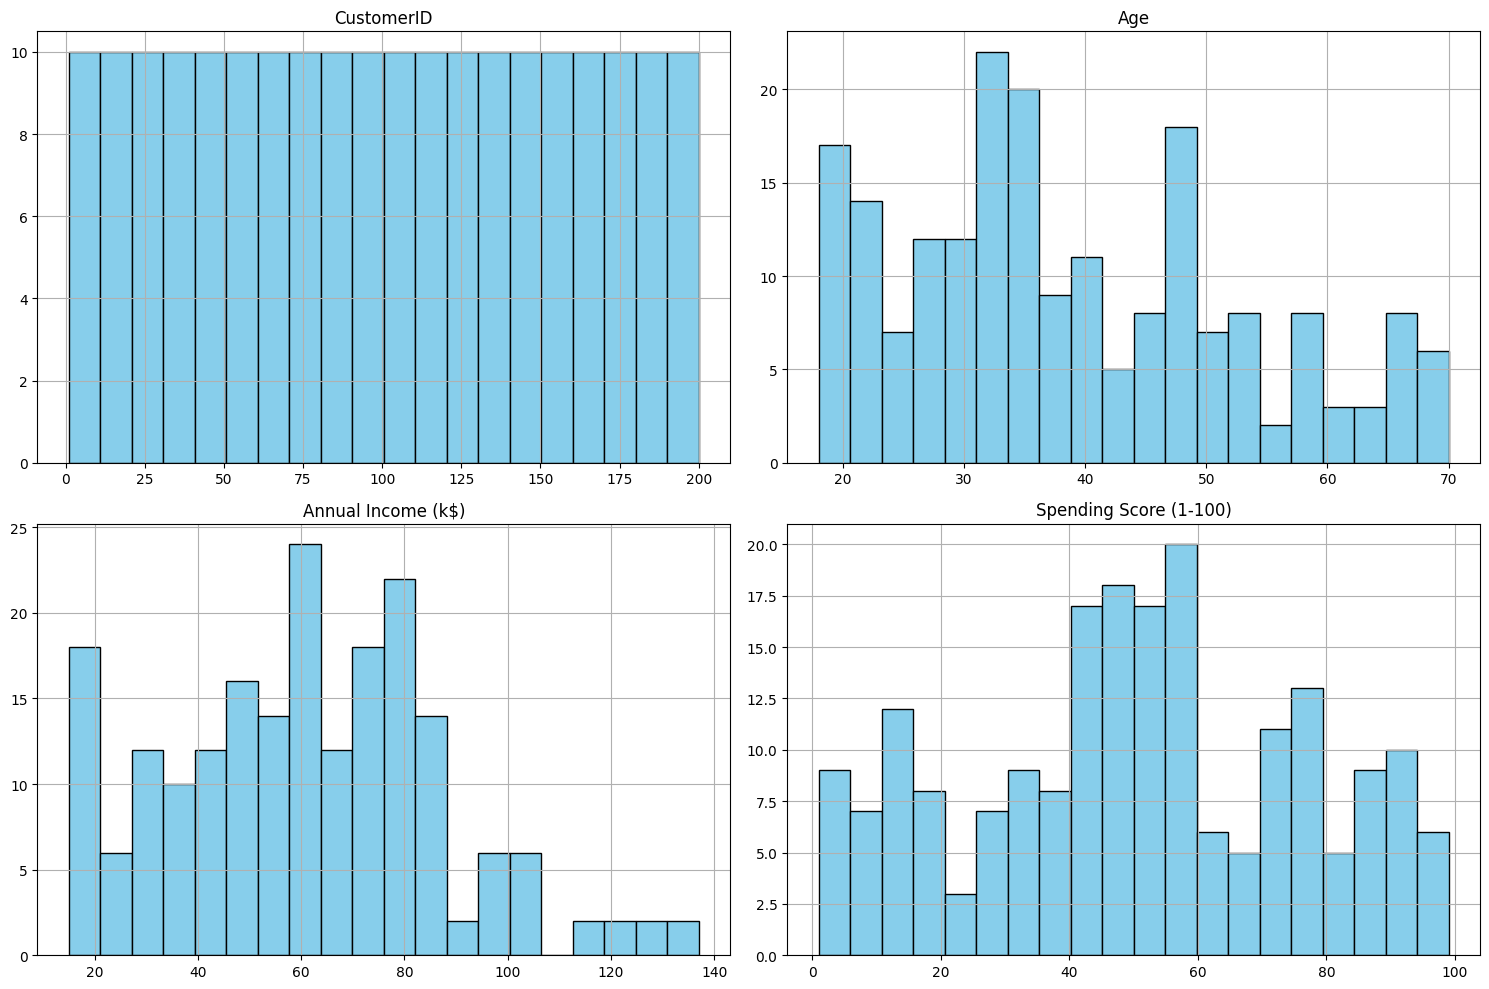

In [56]:
# Plot histograms for all numeric columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

#### 6. Correlation Heatmap

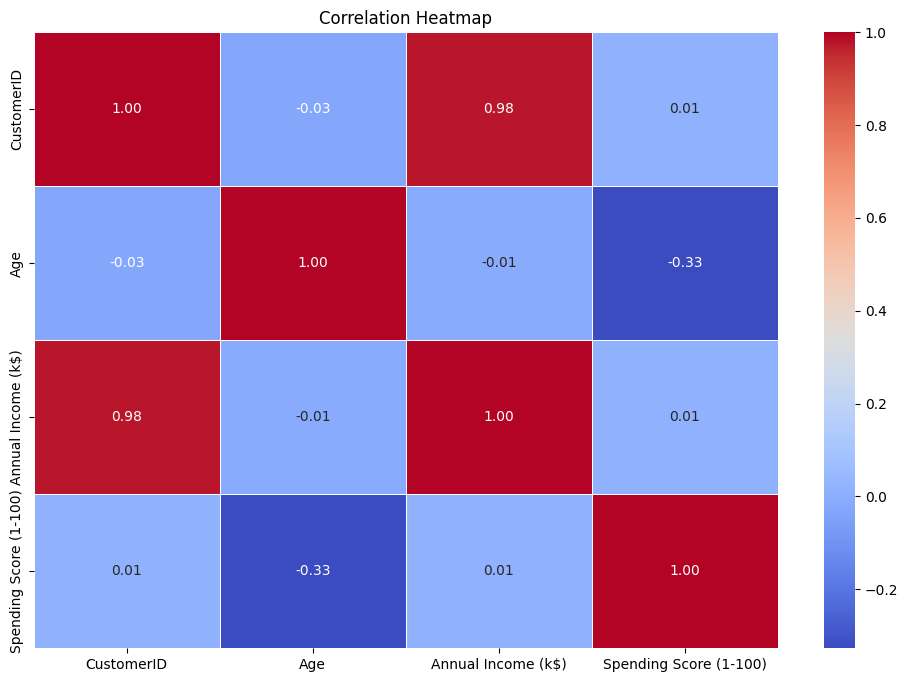

In [57]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

🟥 Strong Correlations

CustomerID & Annual Income	0.98	Very strong positive correlation — likely because CustomerID is in increasing order and the data is sorted by income. However, this is artificial and CustomerID should usually be dropped from analysis.

CustomerID is an identifier and should be removed before applying clustering or ML models.

* The most useful variables for KMeans might be:
* Annual Income, and Spending Score.

### Feature Selection : 

In [59]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]

In [60]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

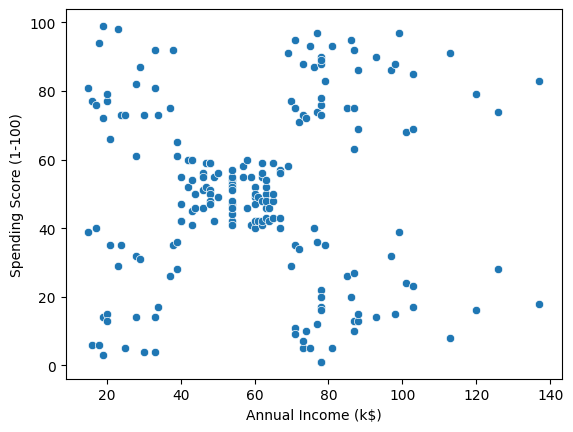

In [61]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

### Applying clustering Technique 

In [78]:
wcss=[]
k=[1,2,3,4,5,6,7,8,9,10]
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

In [79]:
wcss

[270436.78,
 184184.98193760266,
 106644.8496099536,
 73961.78493692426,
 44479.46237711563,
 37292.774295752555,
 31712.17161163305,
 28795.298012501065,
 26286.43083870264,
 20854.764835164835]

<Axes: >

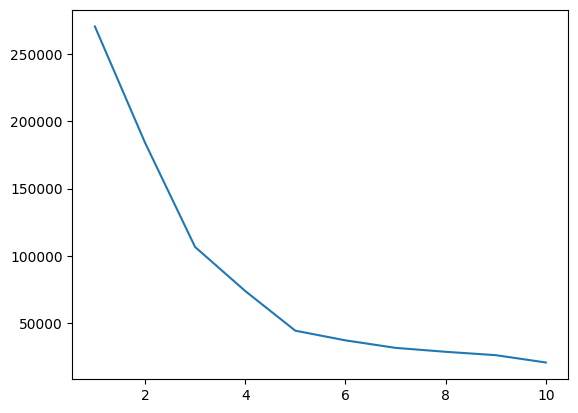

In [80]:
sns.lineplot(y=wcss,x=k)

### KMeans Clustering

In [81]:
model = KMeans(n_clusters=5)

In [82]:
model.fit(x)

KMeans(n_clusters=5)

In [83]:
y_pred=model.predict(x)

In [84]:
x['Cluster']=y_pred

C:\Users\lokes\AppData\Local\Temp\ipykernel_1544\600221928.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
x.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,2
1,15,81,0
2,16,6,2
3,16,77,0
4,17,40,2


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

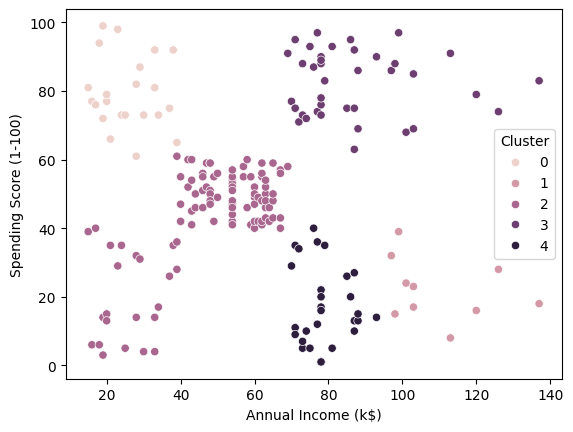

In [86]:
sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'],hue=x['Cluster'])

In [87]:
model.cluster_centers_

array([[2.57272727e+01, 7.93636364e+01, 4.00000000e+00],
       [1.09700000e+02, 2.20000000e+01, 3.00000000e+00],
       [4.81683168e+01, 4.33960396e+01, 2.66453526e-15],
       [8.65384615e+01, 8.21282051e+01, 1.74358974e+00],
       [7.88928571e+01, 1.74285714e+01, 3.00000000e+00]])

In [88]:
model.cluster_centers_[:,0] # x cordinate

array([ 25.72727273, 109.7       ,  48.16831683,  86.53846154,
        78.89285714])

In [89]:
model.cluster_centers_[:,1] # y cordinate

array([79.36363636, 22.        , 43.3960396 , 82.12820513, 17.42857143])

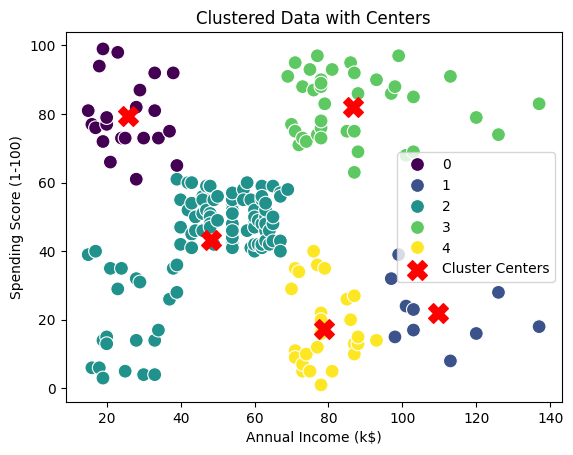

In [90]:
# Scatter plot with clusters
sns.scatterplot(x=x['Annual Income (k$)'], y=x['Spending Score (1-100)'], hue=x['Cluster'], palette='viridis', s=100)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=200, c='red', label='Cluster Centers', marker='X')

# Add legend and labels
plt.legend()
plt.title("Clustered Data with Centers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

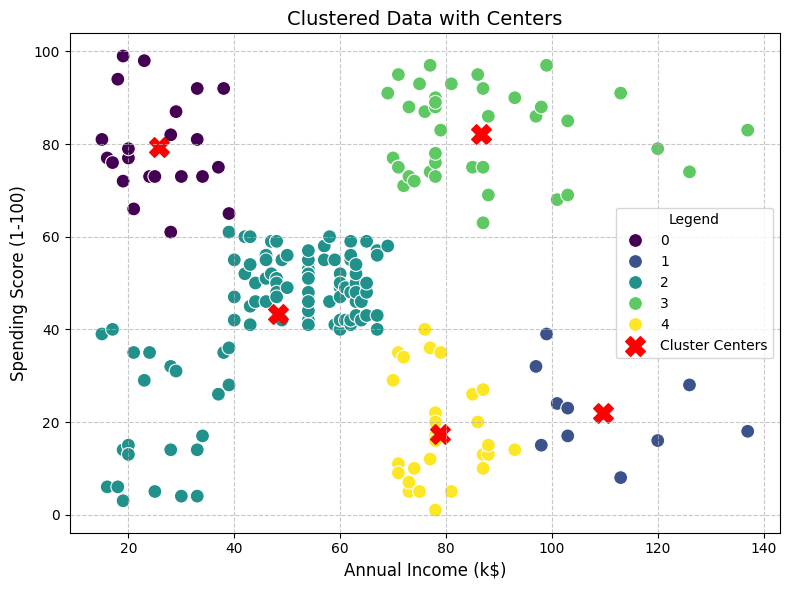

In [91]:
# Scatter plot with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=x['Annual Income (k$)'], 
    y=x['Spending Score (1-100)'], 
    hue=x['Cluster'], 
    palette='viridis', 
    s=100
)

# Overlay cluster centers
plt.scatter(
    model.cluster_centers_[:, 0], 
    model.cluster_centers_[:, 1], 
    s=200, 
    c='red', 
    label='Cluster Centers', 
    marker='X'
)

# Add legend and labels
plt.legend(title="Legend")
plt.title("Clustered Data with Centers", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [92]:
model.inertia_

66740.8744689304

The attribute model.inertia_ in KMeans clustering represents the:

Sum of squared distances (SSE) between each data point and its assigned cluster centroid.

### DBSCAN Clustering 

In [101]:
x

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,2
1,15,81,0
2,16,6,2
3,16,77,0
4,17,40,2
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


In [102]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [103]:
clustering = DBSCAN(eps=3,min_samples=2).fit(x)

In [104]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype=int64)

In [105]:
len(np.unique(clustering.labels_))

32

* There are 32 unique labels :
* One of them is -1, which represents noise points (outliers that don’t belong to any cluster).

This means DBSCAN settings have detected many small clusters, which may or may not be meaningful depending on the context.

### Visualize Clusters

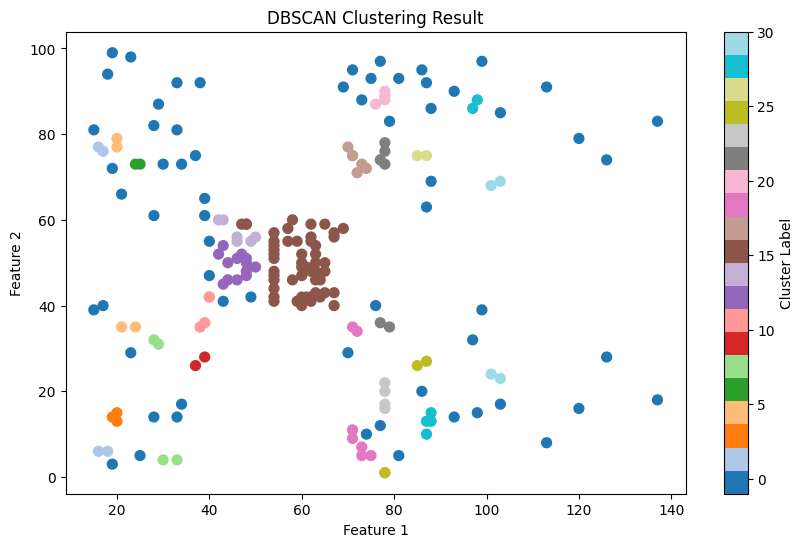

In [106]:
# Visualize DBSCAN clusters (choose two relevant features for 2D plot)
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=clustering.labels_, cmap='tab20', s=50)
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

Each colored group in the plot represents a distinct cluster found by DBSCAN.
The color bar (0 to 30) shows cluster labels, where:
Most densely packed points (center) are part of valid clusters.

Isolated or scattered points (same color as label -1, though not shown in the legend) are outliers/noise.



### 1. Tune DBSCAN Hyperparameters
Goal: Fewer, more meaningful clusters + fewer outliers

In [109]:
clustering = DBSCAN(eps=5, min_samples=5).fit(x)

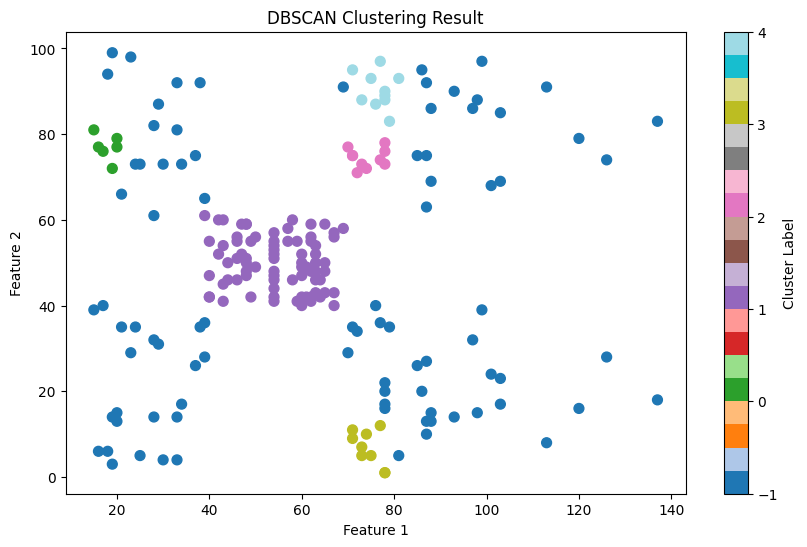

In [110]:
# again visualize 
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=clustering.labels_, cmap='tab20', s=50)
plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

### Which Clustering is Better Here?
✅ K-Means
You chose Annual Income vs Spending Score, which shows distinct and spherical clusters.

* K-Means handled it well.
* The plot is clean, centers are clear, and outliers don’t matter here.

⚠️ DBSCAN
In your case, DBSCAN formed too many small clusters and identified several outliers.

* Probably due to low eps or min_samples.
* If tuned properly, it could detect shape-based clusters or exclude noise, which K-Means can't do.

In [114]:
from sklearn.metrics import silhouette_score

kmeans_score = silhouette_score(x, model.labels_)
dbscan_score = silhouette_score(x, clustering.labels_)

print(f"KMeans Silhouette Score: {kmeans_score:.3f}")
print(f"DBSCAN Silhouette Score: {dbscan_score:.3f}")

KMeans Silhouette Score: 0.462
DBSCAN Silhouette Score: 0.114


This tells you which model formed more meaningful clusters (higher = better).